# Drive Mount

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import os
os.chdir("gdrive/Shared drives/Large Scale Analytics")


In [0]:
%matplotlib inline
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, ImageColorGenerator
from nltk import FreqDist
#split Data
from sklearn.model_selection import train_test_split
#Spacy for "# Tokenization for the Clened Data"
import spacy
from tqdm import tqdm
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])
#CSR Matrix
from sklearn.feature_extraction.text import TfidfVectorizer
#pickel dump
import pickle
#models
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split


# Pickel Dataset read

In [0]:
df_happy_moment = pd.read_pickle("./df_happy_moment_11_15.pkl")
XTrain = pd.read_pickle("./XTrain_Cleaned_hm_11_15.pkl")
XTest = pd.read_pickle("./XTest_Cleaned_hm_11_15.pkl")
yTrain = pd.read_pickle("./yTrain_prediction_11_15.pkl")
yTest = pd.read_pickle("./yTest_prediction_11_15.pkl")
cv_train = pd.read_pickle("./cv_train_CSR_Matrix_11_15.pkl")
cv_test = pd.read_pickle("./cv_test_CSR_Matrix_11_15.pkl")

In [63]:
df_happy_moment[["cleaned_hm"]]
df_happy_moment[["predicted_category"]]

,predicted_category
0,affection
1,affection
2,exercise
3,bonding
4,affection
...,...
100530,affection
100531,enjoy_the_moment
100532,affection
100533,bonding


In [5]:
# print(XTrain.head())
# print(XTest.head(1))
# print(yTrain.head(1))
# print(yTest.head(1))
# cv_train[0,1649]
# print(cv_train[0,4185])
# print(cv_train)
# print(cv_test[20103,2059])
print("XTrain shape ", XTrain.shape)
print("yTrain shape ", yTrain.shape)
print("cv_train shape ", cv_train.shape)


XTrain shape  (80428, 1)
yTrain shape  (80428,)
cv_train shape  (80428, 5000)


# Function: Plot ROC(Receiver operating characteristic) curve

In [0]:
#y_test_num = Ytest
# pred_num = cv_test , x_test
def print_roc(y_test_num, pred_num,clsType):  
  clsType = "Receiver operating characteristic: "+clsType
  fpr, tpr, thresholds = roc_curve(yTestNum, [x for x in pred_num], pos_label=1) #nb_predNum
  print("fpr",fpr)
  print("tpr",tpr)
  print("thresholds",thresholds)
  # fpr, tpr, thresholds = roc_curve(yTestNum, [x[1] for x in pred_num], pos_label=1) #nb_predNum
  roc_auc = auc(fpr, tpr)
  print('roc_auc: ', roc_auc)
  plt.plot(fpr, tpr, lw=1, alpha=0.9, label='ROC fold (AUC = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(clsType)
  plt.legend(loc="lower right")
  plt.show()

# from sklearn.metrics import roc_auc_score
# roc_auc_score(y_test,y_pred)

# def print_roc(y_test, y_pred, average="macro"):
#   lb = LabelBinarizer()
#   lb.fit(y_test)
#   roc_curve
#   y_test = lb.transform(y_test)
#   y_pred = lb.transform(y_pred)
#   fpr, tpr, thresholds = roc_curve(yTestNum, pred_num, pos_label=1)
#   return roc_auc_score(y_test, y_pred, average=average)


# Function: Plot ROC(Receiver operating characteristic) curve 1

In [57]:


# def print_roc(y_test_num, pred_num,clsType):  
#   clsType = "Receiver operating characteristic: "+clsType
#   fpr, tpr, thresholds = roc_curve(yTestNum, pred_num, pos_label=1) #nb_predNum
#   # fpr, tpr, thresholds = roc_curve(yTestNum, [x[1] for x in pred_num], pos_label=1) #nb_predNum
#   roc_auc = auc(fpr, tpr)
#   print('roc_auc: ', roc_auc)
#   plt.plot(fpr, tpr, lw=1, alpha=0.9, label='ROC fold (AUC = %0.2f)' % roc_auc)
#   plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
#   plt.xlabel('False Positive Rate')
#   plt.ylabel('True Positive Rate')
#   plt.title(clsType)
#   plt.legend(loc="lower right")
#   plt.show()


(20107, 7)

# Model: MultinomialNB

In [7]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(cv_train, yTrain)
nb_pred = clf.predict(cv_test)
print(metrics.classification_report(yTest, nb_pred))

                  precision    recall  f1-score   support

     achievement       0.47      0.45      0.46      6905
       affection       0.43      0.50      0.46      6768
         bonding       0.44      0.28      0.34      2236
enjoy_the_moment       0.16      0.18      0.17      2165
        exercise       0.01      0.01      0.01       225
         leisure       0.23      0.17      0.19      1461
          nature       0.02      0.01      0.01       347

        accuracy                           0.39     20107
       macro avg       0.25      0.23      0.24     20107
    weighted avg       0.39      0.39      0.38     20107



In [108]:
# encoder converts the labels into numbers e.g affection =1, achievement=2

nb_pred_s = pd.Series(nb_pred)
encoder = LabelEncoder()
# encoder = LabelBinarizer()

encoder.fit(yTest)
yTestNum = encoder.transform(yTest)
# nb_predNum = encoder.transform(nb_pred_s)

pred_prob = clf.predict_proba(cv_test)
# print(pred_prob)
print([x[1] for x in pred_prob])
# print(type(nb_pred_s))
# print(type(yTest))

[0.39080372347579057, 0.2871855527358361, 0.4679430773202637, 0.1038454797282353, 0.33662535192408494, 0.4455834926384012, 0.1415601718326379, 0.6394605959451903, 0.08183579739591317, 0.2718112297838008, 0.5535450323285778, 0.03349709565932263, 0.15902175169191185, 0.1999205516540866, 0.6557069992833219, 0.24674664376779945, 0.26641311782001587, 0.09687073007471433, 0.13683973163306506, 0.32468068735551564, 0.3140333036057144, 0.21594619505318902, 0.8361799817346564, 0.25612978320124485, 0.16857871189731966, 0.11484866957663988, 0.34033419015971733, 0.03795205470515805, 0.11291802501399403, 0.5865899410096843, 0.17113871967714184, 0.5907809149036073, 0.1778292423300749, 0.34652796391307894, 0.27280898987029917, 0.16279105509258623, 0.39807913352642266, 0.3730643900793266, 0.3010065343403612, 0.12439685266920611, 0.11653930529931379, 0.16091897002225633, 0.9200778892666073, 0.27955378497915007, 0.1474013108989253, 0.6331374190463995, 0.3838755193830913, 0.6444911656099114, 0.74427954287

roc_auc:  0.6128893225698228


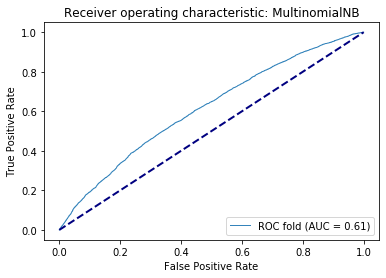

In [109]:

fpr, tpr, thresholds = roc_curve(yTestNum, [x[1] for x in pred_prob], pos_label=1) #nb_predNum

roc_auc = auc(fpr, tpr)
print('roc_auc: ', roc_auc)
plt.plot(fpr, tpr, lw=1, alpha=0.9, label='ROC fold (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: MultinomialNB')
plt.legend(loc="lower right")
plt.show()

# Model: SGD

In [64]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(loss='hinge', penalty='l2',
    alpha=1e-3, random_state=42,    max_iter=200, tol=None)

sgd.fit(cv_train, yTrain)
sgd_pred = sgd.predict(cv_test)

print(metrics.classification_report(yTest, sgd_pred))

                  precision    recall  f1-score   support

     achievement       0.34      0.92      0.50      6905
       affection       0.42      0.09      0.15      6768
         bonding       0.09      0.00      0.01      2236
enjoy_the_moment       0.09      0.00      0.00      2165
        exercise       0.00      0.00      0.00       225
         leisure       0.33      0.01      0.02      1461
          nature       0.14      0.01      0.03       347

        accuracy                           0.35     20107
       macro avg       0.20      0.15      0.10     20107
    weighted avg       0.30      0.35      0.22     20107



fpr [0.         0.0018742  0.00434815 0.00472299 0.00524777 0.01042057
 0.0731689  1.        ]
tpr [0.         0.00177305 0.00413712 0.00458038 0.00517139 0.00827423
 0.09618794 1.        ]
thresholds [7 6 5 4 3 2 1 0]
roc_auc:  0.511315891100892


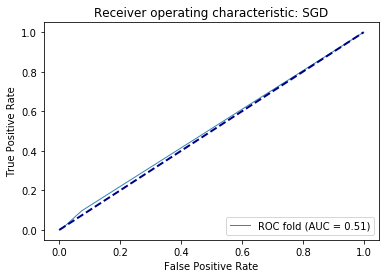

In [85]:
clsType = "SGD"
encoder = LabelEncoder()
# encoder = LabelBinarizer()
encoder.fit(yTest)
yTestNum = encoder.transform(yTest)
# encoder = LabelBinarizer()
# encoder.fit(yTest,classes = ["achievement","affection","bonding","enjoy_the_moment",""])
# yTestNum = encoder.transform(yTest)
from sklearn.metrics import roc_auc_score
sgd_predNum = encoder.transform(sgd_pred)
print_roc(yTestNum, sgd_predNum,clsType)
# print_roc(yTestNum, sgd_predNum)

In [71]:
print(type(yTestNum))
print(type(sgd_predNum))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [89]:
# print(yTestNum[1:30])
# print(sgd_predNum[1:30])

print()


[0 1 1 3 6 3 0 0 1 0 6 0 1 1 2 5 0 1 3 0 3 1 0 2 1 1 3 0 1]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]


# Model: SVM

In [12]:
from sklearn.svm import LinearSVC

linear_svm = LinearSVC(loss='hinge', penalty='l2', class_weight='balanced', random_state=42)
linear_svm.fit(cv_train, yTrain)

svm_pred = linear_svm.predict(cv_test)
print(metrics.classification_report(yTest, svm_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


                  precision    recall  f1-score   support

     achievement       0.36      0.73      0.48      6905
       affection       0.39      0.10      0.17      6768
         bonding       0.24      0.03      0.05      2236
enjoy_the_moment       0.14      0.16      0.15      2165
        exercise       0.00      0.00      0.00       225
         leisure       0.09      0.08      0.08      1461
          nature       0.04      0.02      0.03       347

        accuracy                           0.31     20107
       macro avg       0.18      0.16      0.14     20107
    weighted avg       0.30      0.31      0.25     20107



roc_auc:  0.511315891100892


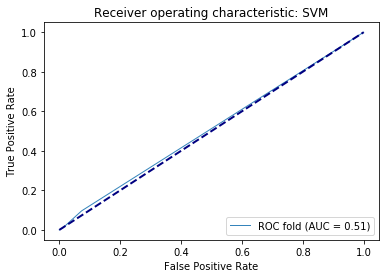

In [13]:
clsType = "SVM"
sgd_predNum = encoder.transform(sgd_pred)
print_roc(yTestNum, sgd_predNum,clsType)

# Model: XGBoost

In [16]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(cv_train , yTrain)

# make predictions for test data
xg_pred = model.predict(cv_test)

print(metrics.classification_report(yTest, xg_pred))

                  precision    recall  f1-score   support

     achievement       0.34      0.96      0.51      6905
       affection       0.38      0.03      0.05      6768
         bonding       0.09      0.00      0.01      2236
enjoy_the_moment       0.00      0.00      0.00      2165
        exercise       0.00      0.00      0.00       225
         leisure       0.24      0.01      0.02      1461
          nature       0.13      0.02      0.04       347

        accuracy                           0.34     20107
       macro avg       0.17      0.15      0.09     20107
    weighted avg       0.27      0.34      0.19     20107



roc_auc:  0.5012718276027015


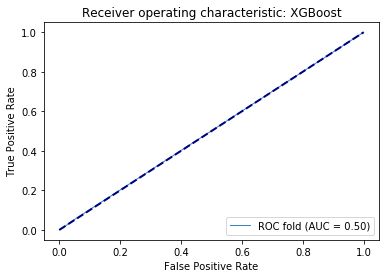

In [17]:
clsType = "XGBoost"
xg_predNum = encoder.transform(xg_pred)
print_roc(yTestNum, xg_predNum,clsType)

# Model: KNN

In [0]:
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)
# Fit the classifier to the data
knn.fit(cv_train,yTrain)
knn_predict = knn.predict(cv_test)

In [87]:
from sklearn import metrics
print(metrics.classification_report(yTest, knn_predict))

                  precision    recall  f1-score   support

     achievement       0.34      0.95      0.51      6905
       affection       0.36      0.02      0.04      6768
         bonding       0.23      0.01      0.01      2236
enjoy_the_moment       0.11      0.02      0.03      2165
        exercise       0.00      0.00      0.00       225
         leisure       0.30      0.04      0.07      1461
          nature       0.00      0.00      0.00       347

        accuracy                           0.34     20107
       macro avg       0.19      0.15      0.09     20107
    weighted avg       0.30      0.34      0.20     20107



fpr [0.00000000e+00 7.49681385e-04 1.21448384e-02 1.44688507e-02
 3.13366819e-02 3.58347702e-02 5.66759127e-02 1.00000000e+00]
tpr [0.         0.00118203 0.00871749 0.00886525 0.02689125 0.02851655
 0.05141844 1.        ]
thresholds [7 6 5 4 3 2 1 0]
roc_auc:  0.4972505977955822


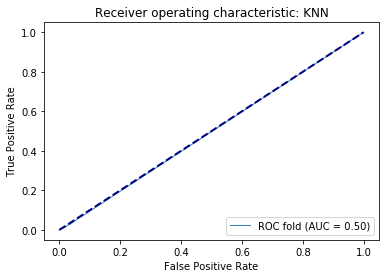

In [104]:
clsType = "KNN"
knn_predNum = encoder.transform(knn_predict)
yTestNum = encoder.transform(yTest)
print_roc(yTestNum, knn_predNum,clsType)

In [0]:
# # print(yTestNum[1:30])
# # print(knn_predNum[3:30])

# z = [x for x in knn_predict]
# z


# Model: LogisticRegression


In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
from sklearn import metrics
from sklearn.metrics import classification_report
logreg = Pipeline([('clf', LogisticRegression(n_jobs=1, C=1e5)),])
logreg.fit(cv_train, yTrain)

# %%time

y_pred = logreg.predict(cv_test)

print('accuracy %s' % accuracy_score(y_pred, yTest))
print(classification_report(yTest, y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


accuracy 0.3176505694534242
                  precision    recall  f1-score   support

     achievement       0.38      0.50      0.43      6905
       affection       0.40      0.29      0.34      6768
         bonding       0.25      0.19      0.22      2236
enjoy_the_moment       0.13      0.17      0.15      2165
        exercise       0.02      0.00      0.01       225
         leisure       0.13      0.09      0.11      1461
          nature       0.02      0.02      0.02       347

        accuracy                           0.32     20107
       macro avg       0.19      0.18      0.18     20107
    weighted avg       0.32      0.32      0.31     20107



fpr [0.         0.01754254 0.07002024 0.07354374 0.2240048  0.32191319
 0.54509334 1.        ]
tpr [0.         0.01359338 0.0625     0.06471631 0.20670804 0.2696513
 0.5641253  1.        ]
thresholds [7 6 5 4 3 2 1 0]
roc_auc:  0.4948858448368664


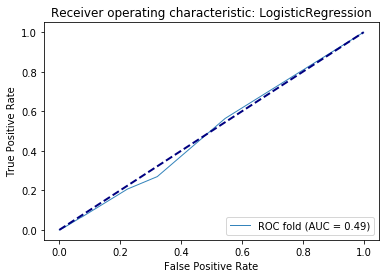

In [115]:
clsType = "LogisticRegression"
Logistic_predNum = encoder.transform(y_pred)
# yTestNum = encoder.transform(yTest)
print_roc(yTestNum, Logistic_predNum,clsType)

# temp